# Text classification task

### At the input,a set of text reviews about films marked as positive and negative (positive and negative),2000 entries.

You can read more about these data here: http://ai.stanford.edu/~amaas/data/sentiment/



##Import libraries,load a file 

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/moviereviews.csv')

In [5]:
df.head()


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [6]:
#check for missing values
df.isnull().sum()

label      0
review    35
dtype: int64

In [7]:
#delete NaN
df = df.dropna()

In [8]:
#find reviews with empty text or space
df['review'].str.isspace().sum()

27

In [9]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [10]:
# tilda(~) reverses values
df = df[~df['review'].str.isspace()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [12]:
#count number of rows for Label column
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

##Data Wrangling and Transformation

In [13]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

###Machine Learning

In [14]:
#create Pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [15]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [16]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [17]:
#report for the results of the Pipline on test data
from sklearn.metrics import classification_report,plot_confusion_matrix

In [18]:
preds = pipe.predict(X_test)

In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


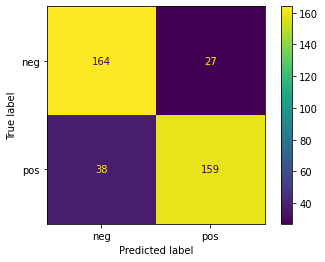

In [21]:
plot_confusion_matrix(pipe,X_test,y_test);

**Model accuracy 83%**